In [1]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3074,4504-YOULA,Female,0,Yes,Yes,35,Yes,Yes,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),59.45,2136.9,No
4663,0722-TROQR,Female,1,No,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.90,321.75,Yes
2914,0484-FFVBJ,Male,0,No,No,32,Yes,No,DSL,No,...,No,No,Yes,Yes,One year,Yes,Bank transfer (automatic),64.85,2010.95,No
7003,4501-VCPFK,Male,0,No,No,26,No,No phone service,DSL,No,...,Yes,Yes,No,No,Month-to-month,No,Electronic check,35.75,1022.5,No
1873,0973-KYVNF,Female,0,Yes,Yes,72,Yes,No,DSL,Yes,...,Yes,No,Yes,No,Two year,Yes,Credit card (automatic),70.65,5011.15,No


In [3]:
df.drop('customerID',axis='columns',inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [5]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [7]:
pd.to_numeric(df.TotalCharges, errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [8]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [9]:
df.shape

(7043, 20)

In [10]:
df.iloc[488].TotalCharges

' '

In [11]:
df1=df[df.TotalCharges!=' ']
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [12]:
df1.shape


(7032, 20)

In [13]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [14]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\Meow\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [15]:
df1.TotalCharges.dtypes

dtype('float64')

In [16]:
tenure_turn_no =df1[df1.Churn=='No'].tenure
tenure_turn_yes =df1[df1.Churn=='Yes'].tenure

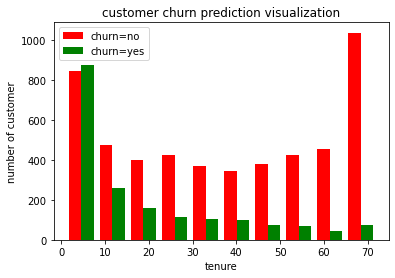

In [17]:
plt.xlabel('tenure')
plt.ylabel('number of customer')
plt.title('customer churn prediction visualization')
plt.hist([tenure_turn_no,tenure_turn_yes],color=['red','green'],label=['churn=no','churn=yes'])
plt.legend()

C:\Users\Meow\AppData\Local\Temp/ipykernel_17040/4271625962.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mc_turn_yes= df1[df.Churn=='Yes'].MonthlyCharges


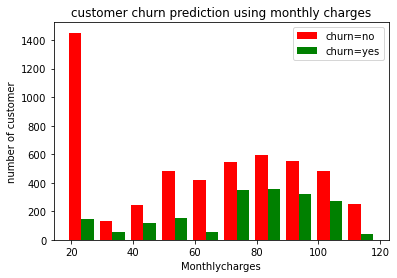

In [18]:
mc_turn_no=df1[df1.Churn=='No'].MonthlyCharges
mc_turn_yes= df1[df.Churn=='Yes'].MonthlyCharges

plt.xlabel('Monthlycharges')
plt.ylabel('number of customer')
plt.title('customer churn prediction using monthly charges')
plt.hist([mc_turn_no,mc_turn_yes],color=['red','green'],label=['churn=no','churn=yes'])
plt.legend()

In [19]:
def print_unique_col(df):
    for column in df:
        if (df[column].dtypes=='object'):
            print(f'{column}:{df[column].unique()}')

In [20]:
print_unique_col(df1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [21]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

C:\Users\Meow\anaconda3\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [22]:
print_unique_col(df1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [23]:
yes_no_columns=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in yes_no_columns:
    df1[col].replace({'Yes':1,'No':0},inplace=True)

C:\Users\Meow\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [24]:
for col in df1:
    print(f'{col}:{df1[col].unique()}')

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [25]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [26]:
df1['gender'].unique()

array([1, 0], dtype=int64)

In [27]:
df2=pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [28]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1569,1,0,1,1,15,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
3555,0,0,0,0,20,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
3688,1,0,0,0,41,1,1,0,0,1,...,0,1,0,1,0,0,1,0,0,0


In [29]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [30]:
cols_to_scale=['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
    
df2[cols_to_scale]=scaler.fit_transform(df2[cols_to_scale])

In [31]:
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2745,0,1,1,0,0.000000,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2766,1,0,1,0,0.887324,1,1,1,1,1,...,0,1,0,0,1,0,0,0,1,0
3028,0,0,0,0,0.056338,0,0,1,1,1,...,1,0,0,1,0,0,0,0,0,1
6810,0,0,0,0,0.197183,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0


In [32]:
X =df2.drop('Churn',axis='columns')
y=df2['Churn']

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2,random_state=5)


In [34]:
X_train.shape

(5625, 26)

In [35]:
X_test.shape

(1407, 26)

In [36]:
#Build an ANN model

import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

In [37]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [38]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
176/176 [==============================] - 2s 3ms/step - loss: 0.4963 - accuracy: 0.7456
Epoch 2/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4299 - accuracy: 0.7904
Epoch 3/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4205 - accuracy: 0.7959
Epoch 4/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4161 - accuracy: 0.8028
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4129 - accuracy: 0.8066
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4107 - accuracy: 0.8025
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4081 - accuracy: 0.8080
Epoch 8/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4055 - accuracy: 0.8082
Epoch 9/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4047 - accuracy: 0.8103
Epoch 10/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4025 - accura

In [54]:
count_class_0, count_class_1 =df1.Churn.value_counts()

df_class_0 =df2[df2['Churn']==0]
df_class_1 =df2[df2['Churn']==1]

In [55]:
df_class_0.shape

(5163, 27)

In [56]:
df_class_1.shape

(1869, 27)

In [57]:
df_class_0_under =df_class_0.sample(count_class_1)
df_test_under =pd.concat([df_class_0_under, df_class_1], axis=0)

print("Random under sampling")
print(df_test_under.Churn.value_counts())

Random under sampling
0    1869
1    1869
Name: Churn, dtype: int64


In [58]:
X =df_test_under.drop('Churn',axis='columns')
y= df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [59]:
y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [60]:
y_preds =ANN(X_train, y_train, X_test, y_test,'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 3ms/step - loss: 0.6097 - accuracy: 0.6943
Epoch 2/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5332 - accuracy: 0.7455
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5091 - accuracy: 0.7612
Epoch 4/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4976 - accuracy: 0.7605
Epoch 5/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4904 - accuracy: 0.7682
Epoch 6/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4862 - accuracy: 0.7712
Epoch 7/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4823 - accuracy: 0.7722
Epoch 8/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4789 - accuracy: 0.7702
Epoch 9/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4777 - accuracy: 0.7726
Epoch 10/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4760 - accuracy: 0.7746
Epoch 11/

94/94 [==============================] - 0s 3ms/step - loss: 0.4068 - accuracy: 0.8107
Epoch 84/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4054 - accuracy: 0.8151
Epoch 85/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4054 - accuracy: 0.8134
Epoch 86/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4046 - accuracy: 0.8191
Epoch 87/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4036 - accuracy: 0.8161
Epoch 88/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4018 - accuracy: 0.8171
Epoch 89/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4055 - accuracy: 0.8144
Epoch 90/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4017 - accuracy: 0.8177
Epoch 91/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4021 - accuracy: 0.8137
Epoch 92/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4031 - accuracy: 0.8104
Epoch 93/100


In [61]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Churn.value_counts())

Random over-sampling:
0    5163
1    5163
Name: Churn, dtype: int64


In [62]:
X = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [63]:
# Number of classes in training Data
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [64]:
loss = keras.losses.BinaryCrossentropy()
weights = -1
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 2s 3ms/step - loss: 0.5518 - accuracy: 0.7315
Epoch 2/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4961 - accuracy: 0.7607
Epoch 3/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4893 - accuracy: 0.7615
Epoch 4/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4850 - accuracy: 0.7626
Epoch 5/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4813 - accuracy: 0.7659
Epoch 6/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4778 - accuracy: 0.7683
Epoch 7/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4741 - accuracy: 0.7691
Epoch 8/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4711 - accuracy: 0.7714
Epoch 9/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4685 - accuracy: 0.7737
Epoch 10/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4653 - accura

In [65]:
!pip install Tensorflow

In [66]:
! pip install imbalanced-learn

In [67]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [69]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [71]:
# Number of classes in training Data
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [72]:
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [73]:
# Regain Original features and labels
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [75]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [76]:
df3 = X_train.copy()
df3['Churn'] = y_train

In [77]:
df3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
684,1,0,0,0,0.000000,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
2446,1,0,0,0,0.239437,1,1,0,1,0,...,1,0,1,0,0,0,1,0,0,1
1680,0,0,1,1,0.774648,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2220,0,0,1,0,1.000000,1,0,1,1,0,...,0,0,0,0,1,1,0,0,0,0
2842,1,0,0,0,0.042254,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0


In [78]:
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [79]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train = df_train.drop('Churn', axis='columns')
    y_train = df_train.Churn
    return X_train, y_train    

In [80]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1495)

y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 2s 4ms/step - loss: 0.6201 - accuracy: 0.6632
Epoch 2/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5173 - accuracy: 0.7418
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5006 - accuracy: 0.7575
Epoch 4/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4937 - accuracy: 0.7592
Epoch 5/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4875 - accuracy: 0.7629
Epoch 6/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4844 - accuracy: 0.7689
Epoch 7/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4820 - accuracy: 0.7679
Epoch 8/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4786 - accuracy: 0.7686
Epoch 9/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4766 - accuracy: 0.7686
Epoch 10/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4746 - accuracy: 0.7709
Epoch 11/

94/94 [==============================] - 0s 2ms/step - loss: 0.3901 - accuracy: 0.8167
Epoch 84/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3902 - accuracy: 0.8247
Epoch 85/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3882 - accuracy: 0.8217
Epoch 86/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3874 - accuracy: 0.8217
Epoch 87/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3897 - accuracy: 0.8231
Epoch 88/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3854 - accuracy: 0.8184
Epoch 89/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3881 - accuracy: 0.8191
Epoch 90/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3848 - accuracy: 0.8231
Epoch 91/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3839 - accuracy: 0.8241
Epoch 92/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3827 - accuracy: 0.8281
Epoch 93/100


In [81]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 1495, 2990)

y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 3ms/step - loss: 0.6129 - accuracy: 0.6759
Epoch 2/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5167 - accuracy: 0.7518
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4987 - accuracy: 0.7552
Epoch 4/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4920 - accuracy: 0.7545
Epoch 5/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4852 - accuracy: 0.7666
Epoch 6/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4804 - accuracy: 0.7639
Epoch 7/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4779 - accuracy: 0.7676
Epoch 8/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4748 - accuracy: 0.7669
Epoch 9/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4718 - accuracy: 0.7662
Epoch 10/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4691 - accuracy: 0.7716
Epoch 11/

94/94 [==============================] - 0s 3ms/step - loss: 0.3841 - accuracy: 0.8207
Epoch 84/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3823 - accuracy: 0.8201
Epoch 85/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3814 - accuracy: 0.8251
Epoch 86/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3793 - accuracy: 0.8187
Epoch 87/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3815 - accuracy: 0.8227
Epoch 88/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3811 - accuracy: 0.8254
Epoch 89/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3786 - accuracy: 0.8264
Epoch 90/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3775 - accuracy: 0.8214
Epoch 91/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3753 - accuracy: 0.8251
Epoch 92/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3773 - accuracy: 0.8234
Epoch 93/100


In [82]:
len(y_pred1)

1407

In [83]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

NameError: name 'y_pred3' is not defined

In [ ]:
cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)